In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib import rc
import pickle
import pandas as pd
from scipy.stats import pearsonr
import rasterio

from GCCM_gao import run_GCCM, get_embedding, get_lag_indices
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Set specific font sizes
plt.rcParams.update({
    'font.size': 12,          # Global font size
    'axes.titlesize': 11,     # Title font size
    'axes.labelsize': 11,     # X and Y axis labels font size
    'xtick.labelsize': 9,    # X-axis tick labels font size
    'ytick.labelsize': 9,    # Y-axis tick labels font size
    'legend.fontsize': 10,    # Legend font size
})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

### Background

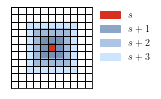

In [231]:
import matplotlib.patches as mpatches
import matplotlib.colors

lags_ = get_lag_indices(11).reshape(11,11)
lags = np.where(lags_<4, lags_, np.nan)

fig, ax = plt.subplots(figsize=(1.5,1.5))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#d7301f","#7890b4","#a2bad9", "#cee5ff"])
#cmap = plt.cm.viridis
cmap.set_bad(color='white')  # Set NaN values to white

# Plot the matrix
cax = ax.imshow(lags, cmap=cmap, interpolation='none')

# Add grid
ax.set_xticks(np.arange(-0.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 10, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
ax.tick_params(which='minor', size=0)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])


# Create legend for colors
colors = [cmap(0), cmap(0.5), cmap(0.75), cmap(1.1)]
labels = [r'$s$', r'$s+1$', r'$s+2$', r'$s+3$']
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,frameon=False)
plt.savefig('plots/lags.pdf', bbox_inches='tight')

## Data

In [16]:
# load data
x = rasterio.open('../Gao_code/raster/dTRI.tif') # cause
xMatrix = x.read(1)
xMatrix = xMatrix.T
y = rasterio.open('../Gao_code/raster/Cu.tif') # effect
yMatrix = y.read(1)
yMatrix = yMatrix.T
z = rasterio.open('../Gao_code/raster/nlights03.tif') # cause
zMatrix = z.read(1)
zMatrix = zMatrix.T
zMatrix = zMatrix.astype(float)

In [4]:
# load data
x = rasterio.open('data/dTRI_aligned.tif') # cause
xMatrix_al = x.read(1)
xMatrix_al = xMatrix_al.T
y = rasterio.open('data/Cu_aligned.tif') # effect
yMatrix_al = y.read(1)
yMatrix_al = yMatrix_al.T
y2 = rasterio.open('data/Mg_aligned.tif') # effect
y2Matrix_al = y2.read(1)
y2Matrix_al = y2Matrix_al.T
z = rasterio.open('data/nlights_aligned.tif') # cause
zMatrix_al = z.read(1)
zMatrix_al = zMatrix_al.T
zMatrix_al = zMatrix_al.astype(float)

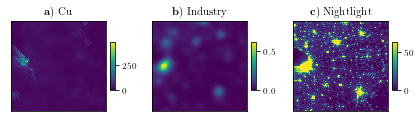

In [68]:
fig, ax = plt.subplots(1,3, figsize=(6, 4))
p0 = ax[0].imshow(yMatrix, origin='lower', interpolation='none')
p1 = ax[1].imshow(xMatrix, origin='lower', interpolation='none')
p2 = ax[2].imshow(zMatrix, origin='lower', interpolation='none')

# Add colorbars next to each image
cbar0 = fig.colorbar(p0, ax=ax[0], fraction=0.046, pad=0.04, aspect=10)
cbar1 = fig.colorbar(p1, ax=ax[1], fraction=0.046, pad=0.04, aspect=10)
cbar2 = fig.colorbar(p2, ax=ax[2], fraction=0.046, pad=0.04, aspect=10)

# Add titles to each subplot
ax[0].set_title(r'$\textbf a)$ Cu')
ax[1].set_title(r'$\textbf b)$ Industry')
ax[2].set_title(r'$\textbf c)$ Nightlight')

# Remove axis tick labels
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig('plots/pollution/pollution_data.pdf', bbox_inches='tight')

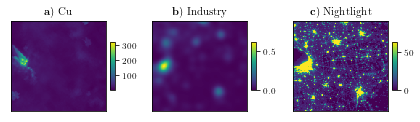

In [69]:
fig, ax = plt.subplots(1,3, figsize=(6, 4))
p0 = ax[0].imshow(yMatrix_al, origin='lower', interpolation='none')
p1 = ax[1].imshow(xMatrix_al, origin='lower', interpolation='none')
p2 = ax[2].imshow(zMatrix_al, origin='lower', interpolation='none')

# Add colorbars next to each image
cbar0 = fig.colorbar(p0, ax=ax[0], fraction=0.046, pad=0.04, aspect=10)
cbar1 = fig.colorbar(p1, ax=ax[1], fraction=0.046, pad=0.04, aspect=10)
cbar2 = fig.colorbar(p2, ax=ax[2], fraction=0.046, pad=0.04, aspect=10)

# Add titles to each subplot
ax[0].set_title(r'$\textbf a)$ Cu')
ax[1].set_title(r'$\textbf b)$ Industry')
ax[2].set_title(r'$\textbf c)$ Nightlight')

# Remove axis tick labels
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig('plots/pollution/pollution_data_aligned.pdf', bbox_inches='tight')

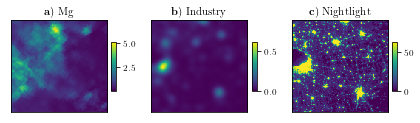

In [187]:
fig, ax = plt.subplots(1,3, figsize=(6, 4))
p0 = ax[0].imshow(y2Matrix_al, origin='lower', interpolation='none')
p1 = ax[1].imshow(xMatrix_al, origin='lower', interpolation='none')
p2 = ax[2].imshow(zMatrix_al, origin='lower', interpolation='none')

# Add colorbars next to each image
cbar0 = fig.colorbar(p0, ax=ax[0], fraction=0.046, pad=0.04, aspect=10)
cbar1 = fig.colorbar(p1, ax=ax[1], fraction=0.046, pad=0.04, aspect=10)
cbar2 = fig.colorbar(p2, ax=ax[2], fraction=0.046, pad=0.04, aspect=10)

# Add titles to each subplot
ax[0].set_title(r'$\textbf a)$ Mg')
ax[1].set_title(r'$\textbf b)$ Industry')
ax[2].set_title(r'$\textbf c)$ Nightlight')

# Remove axis tick labels
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig('plots/pollution/pollution_data_Mg_aligned.pdf', bbox_inches='tight')

In [10]:
E=3
y2Embedings = get_embedding(y2Matrix_al, E)

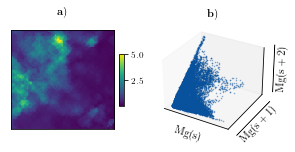

In [82]:
fig = plt.figure(figsize=(4,4))

# First subplot: 2D imshow
ax1 = fig.add_subplot(121)
p0 = ax1.imshow(y2Matrix_al, origin='lower', interpolation='none')
cbar0 = fig.colorbar(p0, ax=ax1, fraction=0.046, pad=0.04, aspect=10)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(r'$\textbf a)$', pad=15)

# Second subplot: 3D plot
ax2 = fig.add_subplot(122, projection='3d')
p1 = ax2.plot(y2Embedings[0].flatten(),np.mean(y2Embedings[1], axis=1),np.mean(y2Embedings[2], axis=1), 
                '.', ms=1, c='#08519c', alpha=0.5)
pad = -10
ax2.set_xlabel(r"$\mathrm{Mg(s)}$", labelpad=pad)
ax2.set_ylabel(r"$\overline{ \mathrm{Mg(s+1)}}$", labelpad=pad)
ax2.set_zlabel(r"$\overline{ \mathrm{Mg(s+2)}}$", labelpad=pad)
ax2.set_title(r"$\textbf b)$")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])


plt.tight_layout()
plt.savefig('plots/pollution/pollution_data_Mg_aligned_emb.png', bbox_inches='tight', dpi=500)

## Correlation 

In [250]:
correlation_coefficient, p_value = pearsonr(xMatrix.flatten(), yMatrix[1:, 1:].flatten()) #[:125, :131]
correlation_coefficient, p_value

(0.5081885953981038, 0.0)

In [249]:
correlation_coefficient, p_value = pearsonr(zMatrix.flatten(), yMatrix[1:, 1:].flatten())
correlation_coefficient, p_value

(0.2317785756243964, 1.2863871116548406e-198)

In [12]:
# aligned
correlation_coefficient, p_value = pearsonr(xMatrix_al.flatten(), yMatrix_al.flatten()) #[:125, :131]
correlation_coefficient, p_value

(0.5081763166626855, 0.0)

In [11]:
correlation_coefficient, p_value = pearsonr(zMatrix_al.flatten(), yMatrix_al.flatten())
correlation_coefficient, p_value

(0.23764209657907767, 5.520265961597534e-209)

In [5]:
# Mg
correlation_coefficient, p_value = pearsonr(xMatrix_al.flatten(), y2Matrix_al.flatten()) #[:125, :131]
correlation_coefficient, p_value

(0.38832414367879287, 0.0)

In [6]:
correlation_coefficient, p_value = pearsonr(zMatrix_al.flatten(), y2Matrix_al.flatten())
correlation_coefficient, p_value

(0.2416650091695058, 2.8937229972726886e-216)

## Embedding

In [83]:
E=3
xEmbedings = get_embedding(xMatrix, E)
yEmbedings = get_embedding(yMatrix, E)
zEmbedings = get_embedding(zMatrix, E)

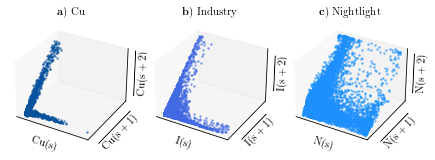

In [86]:
fig, ax = plt.subplots(1,3, figsize=(6, 4), subplot_kw=dict(projection='3d'))
p0 = ax[0].plot(yEmbedings[0].flatten(),np.mean(yEmbedings[1], axis=1),np.mean(yEmbedings[2], axis=1), 
                '.', ms=3, c='#08519c', alpha=0.5)
pad = -10
ax[0].set_xlabel(r"$\mathrm{Cu(s)}$", labelpad=pad)
ax[0].set_ylabel(r"$\overline{ \mathrm{Cu(s+1)}}$", labelpad=pad)
ax[0].set_zlabel(r"$\overline{ \mathrm{Cu(s+2)}}$", labelpad=-12)
ax[0].set_title(r"$\textbf a)$ Cu")

p1 = ax[1].plot(xEmbedings[0].flatten(),np.mean(xEmbedings[1], axis=1),np.mean(xEmbedings[2], axis=1), 
                '.', ms=3, c='royalblue', alpha=0.5)
ax[1].set_xlabel(r"$\mathrm{I(s)}$", labelpad=pad)
ax[1].set_ylabel(r"$\overline{ \mathrm{I(s+1)}}$", labelpad=pad)
ax[1].set_zlabel(r"$\overline{ \mathrm{I(s+2)}}$", labelpad=-12)
ax[1].set_title(r"$\textbf b)$ Industry")

p2 = ax[2].plot(zEmbedings[0].flatten(),np.mean(zEmbedings[1], axis=1),np.mean(zEmbedings[2], axis=1), 
                '.', ms=3, c='dodgerblue', alpha=0.5)
ax[2].set_xlabel(r"$\mathrm{N(s)}$", labelpad=pad)
ax[2].set_ylabel(r"$\overline{ \mathrm{N(s+1)}}$", labelpad=pad)
ax[2].set_zlabel(r"$\overline{ \mathrm{N(s+2)}}$", labelpad=-12)
ax[2].set_title(r"$\textbf c)$ Nightlight")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    a.set_zticks([])

plt.tight_layout()
plt.savefig('plots/pollution/pollution_embedding.png', bbox_inches='tight', dpi=500)

#### alineded

In [87]:
E=3
xEmbedings = get_embedding(xMatrix_al, E)
yEmbedings = get_embedding(yMatrix_al, E)
zEmbedings = get_embedding(zMatrix_al, E)

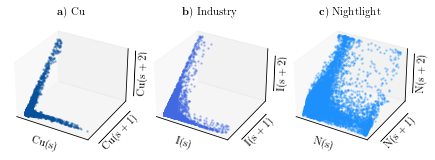

In [88]:
fig, ax = plt.subplots(1,3, figsize=(6, 4), subplot_kw=dict(projection='3d'))
p0 = ax[0].plot(yEmbedings[0].flatten(),np.mean(yEmbedings[1], axis=1),np.mean(yEmbedings[2], axis=1), 
                '.', ms=3, c='#08519c', alpha=0.3)
pad = -10
ax[0].set_xlabel(r"$\mathrm{Cu(s)}$", labelpad=pad)
ax[0].set_ylabel(r"$\overline{ \mathrm{Cu(s+1)}}$", labelpad=pad)
ax[0].set_zlabel(r"$\overline{ \mathrm{Cu(s+2)}}$", labelpad=-12)
ax[0].set_title(r"$\textbf a)$ Cu")

p1 = ax[1].plot(xEmbedings[0].flatten(),np.mean(xEmbedings[1], axis=1),np.mean(xEmbedings[2], axis=1), 
                '.', ms=3, c='royalblue', alpha=0.3)
ax[1].set_xlabel(r"$\mathrm{I(s)}$", labelpad=pad)
ax[1].set_ylabel(r"$\overline{ \mathrm{I(s+1)}}$", labelpad=pad)
ax[1].set_zlabel(r"$\overline{ \mathrm{I(s+2)}}$", labelpad=-12)
ax[1].set_title(r"$\textbf b)$ Industry")

p2 = ax[2].plot(zEmbedings[0].flatten(),np.mean(zEmbedings[1], axis=1),np.mean(zEmbedings[2], axis=1), 
                '.', ms=3, c='dodgerblue', alpha=0.3)
ax[2].set_xlabel(r"$\mathrm{N(s)}$", labelpad=pad)
ax[2].set_ylabel(r"$\overline{ \mathrm{N(s+1)}}$", labelpad=pad)
ax[2].set_zlabel(r"$\overline{ \mathrm{N(s+2)}}$", labelpad=-12)
ax[2].set_title(r"$\textbf c)$ Nightlight")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    a.set_zticks([])

plt.tight_layout()
plt.savefig('plots/pollution/pollution_embedding_aligned.png', bbox_inches='tight', dpi=500)

## Gao results reproduced in python

In [51]:
lib_sizes = np.arange(10,120,20)
dims = np.arange(1,10)

In [49]:
def get_mean(results, arr):
    xy = []
    yx = []
    for i in arr:
        xy.append(results['x_xmap_y'][i]['mean'])
        yx.append(results['y_xmap_x'][i]['mean'])
    return np.array(xy), np.array(yx)
    
def get_interval(results, arr):
    xy_u = []
    xy_l = []
    yx_u = []
    yx_l = []
    for i in arr:
        u, l = results['x_xmap_y'][i]['conf']
        xy_u.append(u)
        xy_l.append(l)
        u, l = results['y_xmap_x'][i]['conf']
        yx_u.append(u)
        yx_l.append(l)
    return np.array(xy_u), np.array(xy_l), np.array(yx_u), np.array(yx_l)

In [65]:
# Load the results from file
# python results
with open('pollution_results/gao_Cu/Iresults.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('pollution_results/gao_Cu/Nresults.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
ix_xmap_y, iy_xmap_x = get_mean(iresults, lib_sizes)
nx_xmap_y, ny_xmap_x = get_mean(nresults, lib_sizes)

# R results
iresultsr = pd.read_csv('../Gao_code/raster/results/Iresults.csv')
nresultsr = pd.read_csv('../Gao_code/raster/results/Nresults.csv')

**x cause**: Industry or Nightlight \
**y effect**: Cu

x xmap y embedding of x variable to predict y (information in x can predict y) so y (Cu) -> x (Industry) \
y xmap x embedding of y variable to predict x (information in  effect y can predict cause x) so x (Industry) -> y (Cu)

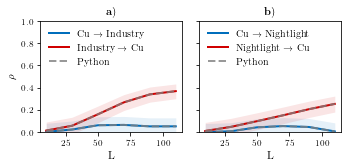

In [15]:
# Appendix figure
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)

ax[0].plot(lib_sizes, list(iresultsr['x_xmap_y_means']),  c='#006EBC', lw=2, label = r'Cu $\rightarrow$ Industry' ) #Industry xmap Cu
ax[0].fill_between(lib_sizes, np.array(iresultsr['x_xmap_y_lower']), np.array(iresultsr['x_xmap_y_upper']), color='#006EBC', alpha=0.1, lw=0)
ax[0].plot(lib_sizes, list(iresultsr['y_xmap_x_means']),  c='#D00000', lw=2, label = r'Industry $\rightarrow$ Cu')
ax[0].fill_between(lib_sizes, np.array(iresultsr['y_xmap_x_lower']), np.array(iresultsr['y_xmap_x_upper']), color='#D00000', alpha=0.1, lw=0)
ax[0].plot(lib_sizes, ix_xmap_y, '--', c='grey', alpha=0.8, lw=2, label='Python') #Cu $\rightarrow$ Industry
ax[0].plot(lib_sizes, iy_xmap_x, '--', c='grey', alpha=0.8, lw=2) #Industry $\rightarrow$ Cu

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend(loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)
    
ax[1].plot(lib_sizes, list(nresultsr['x_xmap_y_means']),c='#006EBC', lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax[1].fill_between(lib_sizes, np.array(nresultsr['x_xmap_y_lower']), np.array(nresultsr['x_xmap_y_upper']), color='#006EBC', alpha=0.1, lw=0)
ax[1].plot(lib_sizes, list(nresultsr['y_xmap_x_means']), c='#D00000', lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax[1].fill_between(lib_sizes, np.array(nresultsr['y_xmap_x_lower']), np.array(nresultsr['y_xmap_x_upper']), color='#D00000', alpha=0.1, lw=0)
ax[1].plot(lib_sizes, nx_xmap_y,  '--', c='grey', alpha=0.8, lw=2, label='Python' ) #Cu $\rightarrow$ Nightlight
ax[1].plot(lib_sizes, ny_xmap_x, '--', c='grey', alpha=0.8, lw=2) #Nightlight $\rightarrow$ Cu

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
legend = ax[1].legend(loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/GCCM_original.pdf', bbox_inches='tight')

## original implementation in R + corrected input

In [63]:
iresultsr_correctin = pd.read_csv('../Gao_code/raster/results/Iresults_correctedin.csv')
nresultsr_correctin = pd.read_csv('../Gao_code/raster/results/Nresults_correctedin.csv')

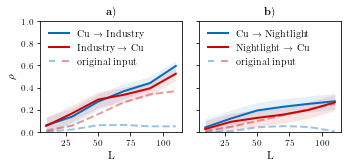

In [67]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)
p1,= ax[0].plot(lib_sizes, list(iresultsr['x_xmap_y_means']), '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[0].plot(lib_sizes, list(iresultsr['y_xmap_x_means']), '--', c='#D00000', alpha=0.4, lw=2)
p3,= ax[0].plot(lib_sizes, list(iresultsr_correctin['x_xmap_y_means']),  c='#006EBC',  lw=2, label = r'Industry xmap Cu')
ax[0].fill_between(lib_sizes, np.array(iresultsr_correctin['x_xmap_y_lower']), np.array(iresultsr_correctin['x_xmap_y_upper']), color='#006EBC', alpha=0.1, lw=0)
p4,= ax[0].plot(lib_sizes, list(iresultsr_correctin['y_xmap_x_means']),  c='#D00000',  lw=2, label = r'Cu xmap Industry')
ax[0].fill_between(lib_sizes, np.array(iresultsr_correctin['y_xmap_x_lower']), np.array(iresultsr_correctin['y_xmap_x_upper']), color='#D00000', alpha=0.1, lw=0)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'original input'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, list(nresultsr['x_xmap_y_means']), '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, list(nresultsr['y_xmap_x_means']), '--', c='#D00000', alpha=0.4, lw=2)
p3,= ax[1].plot(lib_sizes, list(nresultsr_correctin['x_xmap_y_means']),  c='#006EBC',  lw=2, label = r'Nightlight xmap Cu')
ax[1].fill_between(lib_sizes, np.array(nresultsr_correctin['x_xmap_y_lower']), np.array(nresultsr_correctin['x_xmap_y_upper']), color='#006EBC', alpha=0.1, lw=0)
p4,= ax[1].plot(lib_sizes, list(nresultsr_correctin['y_xmap_x_means']),  c='#D00000',  lw=2, label = r'Cu xmap Nightlight')
ax[1].fill_between(lib_sizes, np.array(nresultsr_correctin['y_xmap_x_lower']), np.array(nresultsr_correctin['y_xmap_x_upper']), color='#D00000', alpha=0.1, lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'original input'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/GCCM_fix_a.pdf', bbox_inches='tight')

## Corrected implementation in R + original input

In [72]:
iresultsr_correct = pd.read_csv('../Gao_code/raster_corrected/results/Iresults_corrected.csv')
nresultsr_correct = pd.read_csv('../Gao_code/raster_corrected/results/Nresults_corrected.csv')

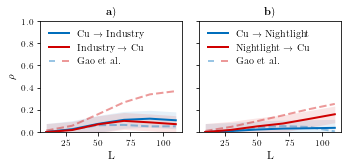

In [73]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)
p1,= ax[0].plot(lib_sizes, list(iresultsr['x_xmap_y_means']), '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[0].plot(lib_sizes, list(iresultsr['y_xmap_x_means']), '--', c='#D00000', alpha=0.4, lw=2)
p3,= ax[0].plot(lib_sizes, list(iresultsr_correct['x_xmap_y_means']),  c='#006EBC',  lw=2, label = r'Industry xmap Cu')
ax[0].fill_between(lib_sizes, np.array(iresultsr_correct['x_xmap_y_lower']), np.array(iresultsr_correct['x_xmap_y_upper']), color='#006EBC', alpha=0.1, lw=0)
p4,= ax[0].plot(lib_sizes, list(iresultsr_correct['y_xmap_x_means']),  c='#D00000',  lw=2, label = r'Cu xmap Industry')
ax[0].fill_between(lib_sizes, np.array(iresultsr_correct['y_xmap_x_lower']), np.array(iresultsr_correct['y_xmap_x_upper']), color='#D00000', alpha=0.1, lw=0)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, list(nresultsr['x_xmap_y_means']), '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, list(nresultsr['y_xmap_x_means']), '--', c='#D00000', alpha=0.4, lw=2)
p3,= ax[1].plot(lib_sizes, list(nresultsr_correct['x_xmap_y_means']),  c='#006EBC',  lw=2, label = r'Nightlight xmap Cu')
ax[1].fill_between(lib_sizes, np.array(nresultsr_correct['x_xmap_y_lower']), np.array(nresultsr_correct['x_xmap_y_upper']), color='#006EBC', alpha=0.1, lw=0)
p4,= ax[1].plot(lib_sizes, list(nresultsr_correct['y_xmap_x_means']),  c='#D00000',  lw=2, label = r'Cu xmap Nightlight')
ax[1].fill_between(lib_sizes, np.array(nresultsr_correct['y_xmap_x_lower']), np.array(nresultsr_correct['y_xmap_x_upper']), color='#D00000', alpha=0.1, lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/GCCM_fix_i.pdf', bbox_inches='tight')

In [8]:
iresultsr_correct

,Unnamed: 0,lib_sizes,x_xmap_y_means,y_xmap_x_means,x_xmap_y_Sig,y_xmap_x_Sig,x_xmap_y_upper,x_xmap_y_lower,y_xmap_x_upper,y_xmap_x_lower
0,10,10,0.000000,0.000000,0.500000,0.500000,0.076902,-0.076902,0.076902,-0.076902
1,30,30,0.025787,0.018564,0.255816,0.318315,0.102486,-0.051216,0.095330,-0.058422
2,50,50,0.073829,0.069916,0.029971,0.037435,0.149880,-0.003091,0.146033,-0.007024
3,70,70,0.110360,0.100904,0.002425,0.005024,0.185686,0.033745,0.176437,0.024189
4,90,90,0.120800,0.087443,0.001017,0.012895,0.195883,0.044310,0.163247,0.010613
5,110,110,0.106233,0.071397,0.003355,0.034449,0.181651,0.029573,0.147489,-0.005536


## Corrected implementation + correct input: Python

In [90]:
# Load the results from file
# python results
with open('pollution_results/corrected_input_Cu/Iresults.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('pollution_results/corrected_input_Cu/Nresults.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
ix_xmap_y_al, iy_xmap_x_al = get_mean(iresults, lib_sizes)
nx_xmap_y_al, ny_xmap_x_al = get_mean(nresults, lib_sizes)

In [92]:
nresults

{'x_xmap_y': {10: {'mean': 0.03906729604799849,
   'sig': 0.15999289779867865,
   'conf': (0.1156219246212097, -0.037948712947696354)},
  30: {'mean': 0.12064167368567887,
   'sig': 0.0010311473362858425,
   'conf': (0.1957277900005233, 0.04414927470372097)},
  50: {'mean': 0.18626846742262285,
   'sig': 8.690878212647135e-07,
   'conf': (0.25945393861172567, 0.11095584761785521)},
  70: {'mean': 0.2011006074783023,
   'sig': 1.1697187063397507e-07,
   'conf': (0.27376876073021944, 0.12614951694587406)},
  90: {'mean': 0.21224022844697277,
   'sig': 2.340398874700611e-08,
   'conf': (0.2844987239822165, 0.1375838324868866)},
  110: {'mean': 0.27499652509260847,
   'sig': 4.818367926873179e-13,
   'conf': (0.34461076928614576, 0.20237429492845574)}},
 'y_xmap_x': {10: {'mean': 0.03850994800424188,
   'sig': 0.16347180233580527,
   'conf': (0.11507116334441739, -0.03850608511809949)},
  30: {'mean': 0.0923778821311344,
   'sig': 0.00924419980557356,
   'conf': (0.1680857909926191, 0.0155

In [53]:
i_xy_u, i_xy_l, i_yx_u, i_yx_l = get_interval(iresults, lib_sizes)
n_xy_u, n_xy_l, n_yx_u, n_yx_l = get_interval(nresults, lib_sizes)

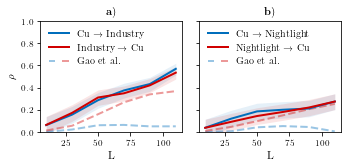

In [71]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)
p1,= ax[0].plot(lib_sizes, list(iresultsr['x_xmap_y_means']), '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[0].plot(lib_sizes, list(iresultsr['y_xmap_x_means']), '--', c='#D00000', alpha=0.4, lw=2)
p3,= ax[0].plot(lib_sizes, ix_xmap_y_al,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Industry')
ax[0].fill_between(lib_sizes, i_xy_l, i_xy_u, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax[0].plot(lib_sizes, iy_xmap_x_al,  c='#D00000',  lw=2, label = r'Industry $\rightarrow$ Cu')
ax[0].fill_between(lib_sizes, i_yx_l, i_yx_u, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, list(nresultsr['x_xmap_y_means']), '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, list(nresultsr['y_xmap_x_means']), '--', c='#D00000', alpha=0.4, lw=2)
p3,= ax[1].plot(lib_sizes, nx_xmap_y_al,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax[1].fill_between(lib_sizes, n_xy_l, n_xy_u, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax[1].plot(lib_sizes, ny_xmap_x_al,  c='#D00000',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax[1].fill_between(lib_sizes, n_yx_l, n_yx_u, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/GCCM_fix_i_a.pdf', bbox_inches='tight')

## Optimal embedding dimension

In [96]:
dims = np.arange(1,10)

In [97]:
# Load the results from file
# python results
with open('pollution_results/corrected_input_Cu/Iresults_optE.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('pollution_results/corrected_input_Cu/Nresults_optE.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
ix_xmap_y_optE, iy_xmap_x_optE = get_mean(iresults, dims)
nx_xmap_y_optE, ny_xmap_x_optE = get_mean(nresults, dims)

i_xy_u, i_xy_l, i_yx_u, i_yx_l = get_interval(iresults, dims)
n_xy_u, n_xy_l, n_yx_u, n_yx_l = get_interval(nresults, dims)

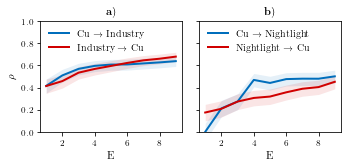

In [74]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)
ax[0].plot(dims, ix_xmap_y_optE,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Industry')
ax[0].fill_between(dims, i_xy_l, i_xy_u, color='#006EBC', alpha=0.1, lw=0)
ax[0].plot(dims, iy_xmap_x_optE,  c='#D00000',  lw=2, label = r'Industry $\rightarrow$ Cu')
ax[0].fill_between(dims, i_yx_l, i_yx_u, color='#D00000', alpha=0.1, lw=0)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend(markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

ax[1].plot(dims, nx_xmap_y_optE,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax[1].fill_between(dims, n_xy_l, n_xy_u, color='#006EBC', alpha=0.1, lw=0)
ax[1].plot(dims, ny_xmap_x_optE,  c='#D00000',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax[1].fill_between(dims, n_yx_l, n_yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('E')
legend = ax[1].legend(markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/pollution_optE_fix_i_a.pdf', bbox_inches='tight')

## Sampled library

In [93]:
# Load the results from file
# python results
with open('pollution_results/sampling_Cu/Iresults_sampling.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('pollution_results/sampling_Cu/Nresults_sampling.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
ix_xmap_y_s, iy_xmap_x_s = get_mean(iresults, lib_sizes)
nx_xmap_y_s, ny_xmap_x_s = get_mean(nresults, lib_sizes)

In [94]:
i_xy_u_s, i_xy_l_s, i_yx_u_s, i_yx_l_s = get_interval(iresults, lib_sizes)
n_xy_u_s, n_xy_l_s, n_yx_u_s, n_yx_l_s = get_interval(nresults, lib_sizes)

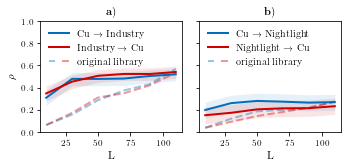

In [77]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)
p1,= ax[0].plot(lib_sizes, ix_xmap_y_al, '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[0].plot(lib_sizes, iy_xmap_x_al, '--', c='#D00000', alpha=0.4, lw=2)

p3,= ax[0].plot(lib_sizes, ix_xmap_y_s,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Industry')
ax[0].fill_between(lib_sizes, i_xy_l_s, i_xy_u_s, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax[0].plot(lib_sizes, iy_xmap_x_s,  c='#D00000',  lw=2, label = r'Industry $\rightarrow$ Cu')
ax[0].fill_between(lib_sizes, i_yx_l_s, i_yx_u_s, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, nx_xmap_y_al, '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, ny_xmap_x_al, '--', c='#D00000', alpha=0.4, lw=2)

p3,= ax[1].plot(lib_sizes, nx_xmap_y_s,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax[1].fill_between(lib_sizes, n_xy_l_s, n_xy_u_s, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax[1].plot(lib_sizes, ny_xmap_x_s,  c='#D00000',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax[1].fill_between(lib_sizes, n_yx_l_s, n_yx_u_s, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/GCCM_sampling.pdf', bbox_inches='tight')

In [57]:
# Load the results from file
# python results
with open('pollution_results/sampling_Cu/Iresults_optE_sampling.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('pollution_results/sampling_Cu/Nresults_optE_sampling.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
ix_xmap_y_optE_s, iy_xmap_x_optE_s = get_mean(iresults, dims)
nx_xmap_y_optE_s, ny_xmap_x_optE_s = get_mean(nresults, dims)

i_xy_u_se, i_xy_l_se, i_yx_u_se, i_yx_l_se = get_interval(iresults, dims)
n_xy_u_se, n_xy_l_se, n_yx_u_se, n_yx_l_se = get_interval(nresults, dims)

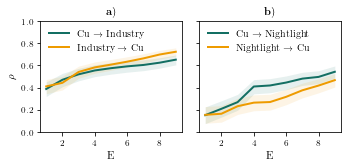

In [105]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)
ax[0].plot(dims, ix_xmap_y_optE_s,  c='#136F63',  lw=2, label = r'Cu $\rightarrow$ Industry')
ax[0].fill_between(dims, i_xy_l_se, i_xy_u_se, color='#136F63', alpha=0.1, lw=0)
ax[0].plot(dims, iy_xmap_x_optE_s,  c='#EE9B00',  lw=2, label = r'Industry $\rightarrow$ Cu')
ax[0].fill_between(dims, i_yx_l_se, i_yx_u_se, color='#EE9B00', alpha=0.1, lw=0)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend(markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

ax[1].plot(dims, nx_xmap_y_optE_s,  c='#136F63',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax[1].fill_between(dims, n_xy_l_se, n_xy_u_se, color='#136F63', alpha=0.1, lw=0)
ax[1].plot(dims, ny_xmap_x_optE_s,  c='#EE9B00',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax[1].fill_between(dims, n_yx_l_se, n_yx_u_se, color='#EE9B00', alpha=0.1, lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('E')
legend = ax[1].legend(markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/pollution_optE_sampling.pdf', bbox_inches='tight')

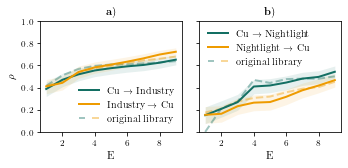

In [106]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)
p1,= ax[0].plot(dims, ix_xmap_y_optE, '--', c='#136F63', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[0].plot(dims, iy_xmap_x_optE, '--', c='#EE9B00', alpha=0.4, lw=2)

p3, = ax[0].plot(dims, ix_xmap_y_optE_s,  c='#136F63',  lw=2, label = r'Cu $\rightarrow$ Industry')
ax[0].fill_between(dims, i_xy_l_se, i_xy_u_se, color='#136F63', alpha=0.1, lw=0)
p4, = ax[0].plot(dims, iy_xmap_x_optE_s,  c='#EE9B00',  lw=2, label = r'Industry $\rightarrow$ Cu')
ax[0].fill_between(dims, i_yx_l_se, i_yx_u_se, color='#EE9B00', alpha=0.1, lw=0)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='lower right', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(dims, nx_xmap_y_optE, '--', c='#136F63', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[1].plot(dims, ny_xmap_x_optE, '--', c='#EE9B00', alpha=0.4, lw=2)

p3, = ax[1].plot(dims, nx_xmap_y_optE_s,  c='#136F63',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax[1].fill_between(dims, n_xy_l_se, n_xy_u_se, color='#136F63', alpha=0.1, lw=0)
p4, = ax[1].plot(dims, ny_xmap_x_optE_s,  c='#EE9B00',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax[1].fill_between(dims, n_yx_l_se, n_yx_u_se, color='#EE9B00', alpha=0.1, lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('E')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/pollution_optE_sampling.pdf', bbox_inches='tight')

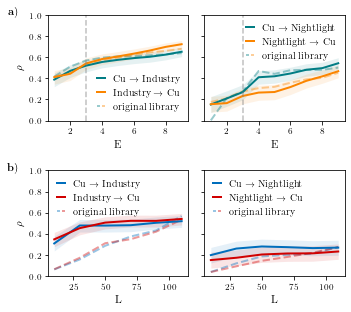

In [116]:
fig, ax = plt.subplots(2,2, figsize=(5,4.5), sharey='row')

p1,= ax.flatten()[0].plot(dims, ix_xmap_y_optE, '--', c='#017D84', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax.flatten()[0].plot(dims, iy_xmap_x_optE, '--', c='#FB8500', alpha=0.4, lw=2)

p3, = ax.flatten()[0].plot(dims, ix_xmap_y_optE_s,  c='#017D84',  lw=2, label = r'Cu $\rightarrow$ Industry')
ax.flatten()[0].fill_between(dims, i_xy_l_se, i_xy_u_se, color='#017D84', alpha=0.1, lw=0)
p4, = ax.flatten()[0].plot(dims, iy_xmap_x_optE_s,  c='#FB8500',  lw=2, label = r'Industry $\rightarrow$ Cu')
ax.flatten()[0].fill_between(dims, i_yx_l_se, i_yx_u_se, color='#FB8500', alpha=0.1, lw=0)
ax.flatten()[0].axvline(x=3, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
ax.flatten()[0].text(-0.25, 1.0, r'$\textbf a)$', transform=ax.flatten()[0].transAxes, fontsize=11, horizontalalignment='center')


ax.flatten()[0].set_ylim(0,1)
#ax.flatten()[0].set_title(r'$\textbf a)$')
ax.flatten()[0].set_xlabel('E')
ax.flatten()[0].set_ylabel(r'$\rho$')
legend = ax.flatten()[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.2)}, 
                      loc='lower right', frameon=False, handlelength=0.8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax.flatten()[1].plot(dims, nx_xmap_y_optE, '--', c='#017D84', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax.flatten()[1].plot(dims, ny_xmap_x_optE, '--', c='#FB8500', alpha=0.4, lw=2)

p3, = ax.flatten()[1].plot(dims, nx_xmap_y_optE_s,  c='#017D84',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax.flatten()[1].fill_between(dims, n_xy_l_se, n_xy_u_se, color='#017D84', alpha=0.1, lw=0)
p4, = ax.flatten()[1].plot(dims, ny_xmap_x_optE_s,  c='#FB8500',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax.flatten()[1].fill_between(dims, n_yx_l_se, n_yx_u_se, color='#FB8500', alpha=0.1, lw=0)
ax.flatten()[1].axvline(x=3, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)

ax.flatten()[1].set_ylim(0,1)
#ax.flatten()[1].set_title(r'$\textbf b)$')
ax.flatten()[1].set_xlabel('E')
legend = ax.flatten()[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.2)}, 
                      loc='upper right', frameon=False, handlelength=0.8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax.flatten()[2].plot(lib_sizes, ix_xmap_y_al, '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax.flatten()[2].plot(lib_sizes, iy_xmap_x_al, '--', c='#D00000', alpha=0.4, lw=2)

p3,= ax.flatten()[2].plot(lib_sizes, ix_xmap_y_s,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Industry')
ax.flatten()[2].fill_between(lib_sizes, i_xy_l_s, i_xy_u_s, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax.flatten()[2].plot(lib_sizes, iy_xmap_x_s,  c='#D00000',  lw=2, label = r'Industry $\rightarrow$ Cu')
ax.flatten()[2].fill_between(lib_sizes, i_yx_l_s, i_yx_u_s, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax.flatten()[2].text(-0.25, 1.0, r'$\textbf b)$', transform=ax.flatten()[2].transAxes, fontsize=11, horizontalalignment='center')
ax.flatten()[2].set_ylim(0,1)
#ax.flatten()[2].set_title(r'$\textbf c)$')
ax.flatten()[2].set_xlabel('L')
ax.flatten()[2].set_ylabel(r'$\rho$')
legend = ax.flatten()[2].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.2)}, 
                      loc='upper left', frameon=False, handlelength=0.8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax.flatten()[3].plot(lib_sizes, nx_xmap_y_al, '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax.flatten()[3].plot(lib_sizes, ny_xmap_x_al, '--', c='#D00000', alpha=0.4, lw=2)

p3,= ax.flatten()[3].plot(lib_sizes, nx_xmap_y_s,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax.flatten()[3].fill_between(lib_sizes, n_xy_l_s, n_xy_u_s, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax.flatten()[3].plot(lib_sizes, ny_xmap_x_s,  c='#D00000',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax.flatten()[3].fill_between(lib_sizes, n_yx_l_s, n_yx_u_s, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax.flatten()[3].set_ylim(0,1)
#ax.flatten()[3].set_title(r'$\textbf d)$')
ax.flatten()[3].set_xlabel('L')
legend = ax.flatten()[3].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=2, pad=0.2)}, 
                      loc='upper left', frameon=False, handlelength=0.8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/GCCM_sampling_all.pdf', bbox_inches='tight')

In [120]:
with open('pollution_results/sampling_Cu/Nresults_E4_sampling.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
nx_xmap_y_s4, ny_xmap_x_s4 = get_mean(nresults, lib_sizes)

In [121]:
n_xy_u_s4, n_xy_l_s4, n_yx_u_s4, n_yx_l_s4 = get_interval(nresults, lib_sizes)

In [122]:
with open('pollution_results/corrected_input_Cu/Nresults_E4.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
nx_xmap_y_e4, ny_xmap_x_e4 = get_mean(nresults, lib_sizes)

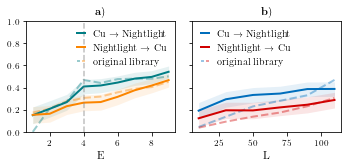

In [126]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=False, sharey=True)
p1,= ax[0].plot(dims, nx_xmap_y_optE, '--', c='#017D84', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[0].plot(dims, ny_xmap_x_optE, '--', c='#FB8500', alpha=0.4, lw=2)

p3, = ax[0].plot(dims, nx_xmap_y_optE_s,  c='#017D84',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax[0].fill_between(dims, n_xy_l_se, n_xy_u_se, color='#017D84', alpha=0.1, lw=0)
p4, = ax[0].plot(dims, ny_xmap_x_optE_s,  c='#FB8500',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax[0].fill_between(dims, n_yx_l_se, n_yx_u_se, color='#FB8500', alpha=0.1, lw=0)
ax[0].axvline(x=4, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.2)}, 
                      loc='upper right', frameon=False, handlelength=0.8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, nx_xmap_y_e4, '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, ny_xmap_x_e4, '--', c='#D00000', alpha=0.4, lw=2)

p3,= ax[1].plot(lib_sizes, nx_xmap_y_s4,  c='#006EBC',  lw=2, label = r'Cu $\rightarrow$ Nightlight')
ax[1].fill_between(lib_sizes, n_xy_l_s4, n_xy_u_s4, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax[1].plot(lib_sizes, ny_xmap_x_s4,  c='#D00000',  lw=2, label = r'Nightlight $\rightarrow$ Cu')
ax[1].fill_between(lib_sizes, n_yx_l_s4, n_yx_u_s4, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'original library'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.2)}, 
                      loc='upper left', frameon=False, handlelength=0.8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/GCCM_sampling_N_E4.pdf', bbox_inches='tight')

## Mg

In [80]:
# R results
iresultsrMg = pd.read_csv('../Gao_code/raster/results/Iresults_Mg.csv')
nresultsrMg = pd.read_csv('../Gao_code/raster/results/Nresults_Mg.csv')

In [81]:
# Load the results from file
# python results
with open('pollution_results/corrected_input_Mg/IMgresults.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('pollution_results/corrected_input_Mg/NMgresults.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
ix_xmap_y_mg, iy_xmap_x_mg = get_mean(iresults, lib_sizes)
nx_xmap_y_mg, ny_xmap_x_mg = get_mean(nresults, lib_sizes)

In [82]:
i_xy_u, i_xy_l, i_yx_u, i_yx_l = get_interval(iresults, lib_sizes)
n_xy_u, n_xy_l, n_yx_u, n_yx_l = get_interval(nresults, lib_sizes)

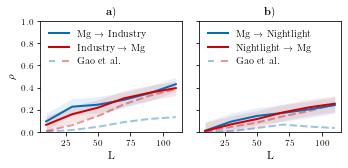

In [83]:
fig, ax = plt.subplots(1,2, figsize=(5,2.5), sharex=True, sharey=True)
p1,= ax[0].plot(lib_sizes, list(iresultsrMg['x_xmap_y_means']), '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[0].plot(lib_sizes, list(iresultsrMg['y_xmap_x_means']), '--', c='#D00000', alpha=0.4, lw=2)
p3,= ax[0].plot(lib_sizes, ix_xmap_y_mg,  c='#006EBC',  lw=2, label = r'Mg $\rightarrow$ Industry')
ax[0].fill_between(lib_sizes, i_xy_l, i_xy_u, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax[0].plot(lib_sizes, iy_xmap_x_mg,  c='#D00000',  lw=2, label = r'Industry $\rightarrow$ Mg')
ax[0].fill_between(lib_sizes, i_yx_l, i_yx_u, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax[0].set_ylim(0,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Mg $\rightarrow$ Industry', r'Industry $\rightarrow$ Mg', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, list(nresultsrMg['x_xmap_y_means']), '--', c='#006EBC', alpha=0.4, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, list(nresultsrMg['y_xmap_x_means']), '--', c='#D00000', alpha=0.4, lw=2)
p3,= ax[1].plot(lib_sizes, nx_xmap_y_mg,  c='#006EBC',  lw=2, label = r'Mg $\rightarrow$ Nightlight')
ax[1].fill_between(lib_sizes, n_xy_l, n_xy_u, color='#006EBC', alpha=0.1, label='Confidence Interval', lw=0)
p4,= ax[1].plot(lib_sizes, ny_xmap_x_mg,  c='#D00000',  lw=2, label = r'Nightlight $\rightarrow$ Mg')
ax[1].fill_between(lib_sizes, n_yx_l, n_yx_u, color='#D00000', alpha=0.1, label='Confidence Interval', lw=0)

ax[1].set_ylim(0,1)
ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Mg $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Mg', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots/pollution/GCCM_Mg_fix_i_a.pdf', bbox_inches='tight')